In [3]:
import pandas as pd
import numpy as np
from random import sample
from pandas import *
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Libraries from Alan
from __future__ import division
import json
import os
from matplotlib.pyplot import *

import requests
#import tmy_ids

# Show Plots in the Notebook
%matplotlib inline

# Make Plots larger
rcParams['figure.figsize']= (10, 6)
rcParams['font.size'] = 14

%matplotlib inline

print 'Pandas version: ' + pd.__version__

Pandas version: 0.14.0


In [4]:
tmy3_to_noaa = [
    (702730, 'Anchorage Intl AP', 'II', 'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US'),
    (703980, 'Annette Island AP', 'II',  'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US'),
    (700260, 'Barrow W Post-W Rogers Arpt [NSA - ARM]', 'II', 'BARROW W POST W ROGERS AIRPORT AK US'),
    (702190, 'Bethel Airport', 'II', 'BETHEL AIRPORT AK US'),
    (701740, 'Bettles Field', 'II', 'BETTLES AIRPORT AK US'),
    (702670, 'Big Delta Allen AAF', 'II', 'BIG DELTA AIRPORT AK US'),
    (703160, 'Cold Bay Arpt', 'II', 'COLD BAY AIRPORT AK US'),
    (702610, 'Fairbanks Intl Arpt', 'II', 'FAIRBANKS INTERNATIONAL AIRPORT AK US'),
    (702710, 'Gulkana Intermediate Field', 'II',  'GULKANA AIRPORT AK US'),
    (703410, 'Homer Arpt', 'II', 'HOMER AIRPORT AK US'),
    (703810, 'Juneau Intl Arpt', 'II', 'JUNEAU INTERNATIONAL AIRPORT AK US'),
    (703260, 'King Salmon Arpt', 'II', 'KING SALMON AIRPORT AK US'),
    (703500, 'Kodiak Airport', 'II',  'KODIAK AIRPORT AK US'),
    (701330, 'Kotzebue Ralph Wein Memorial', 'II', 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK '),
    (702310, 'McGrath Arpt', 'II', 'MCGRATH AIRPORT AK US'),
    (702000, 'Nome Municipal Arpt', 'II', 'NOME MUNICIPAL AIRPORT AK US'),
    (703080, 'St Paul Island Arpt', 'II', 'ST PAUL ISLAND AIRPORT AK US'),
    (702510, 'Talkeetna State Arpt', 'II', 'TALKEETNA AIRPORT AK US'),
    (703610, 'Yakutat State Arpt', 'II', 'YAKUTAT AIRPORT AK US'),
    (702986, 'Big River Lake', 'II', 'BIG RIVER LAKES AK US'),
    (702960, 'Cordova', 'II','CORDOVA M K SMITH AIRPORT AK US'),
    (704890, 'Dutch Harbor', 'II', 'DUTCH HARBOR AK US'),
    (702650, 'Fairbanks/Eielson A', 'II', 'EIELSON FIELD AK US'),
    
    #'Homer Arpt' is 7 miles away from Homer 8 NW.  The airport is on the coast and the NW site is inland.
    # Auke bay:  do we need this one?
    # Alyeska: don't think we need it
    # Cannery: middle of nowhere
    # College 5 NW, College, North Pole, University Experiment Station are unnecessary since we have Fairbanks station
    # Cooper landing: no nearby Tmy3
    # Eagle airport - nothing nearby
    # Glen alps : no station
    # Kitoi bay : nothing nearby, on Kodiak island
    # Kuparuk : 28 miles from deadhorse - use deadhorse tmy station?
    # little port walter not near anything
    # Matanuska Agricultural : 6 miles from Palmer Municipal TMY3 station
    (702740, 'Palmer Municipal', 'II', 'MATANUSKA AGRICULTURAL EXPERIMENT STATION AK US'),
    # main bay: not near anything
    # Tok : nothing nearby
    # White's crossing : no nearby tmy3
    # Nabesna: nothing close
    # Sutton: 10 miles from Palmer Municipal Airport tmy3 station
    # Port Alsworth: Nothing nearby
    (703400, 'Iliamna Arpt', 'II', 'ILIAMNA AIRPORT AK US'),
    (702590, 'Kenai Municipal AP', 'II', 'KENAI MUNICIPAL AIRPORT AK US'),
    (702910, 'Northway Airport', 'II', 'NORTHWAY AIRPORT AK US'),
    (702770, 'Seward', 'II', 'SEWARD AIRPORT AK US'),
    (703710, 'Sitka Japonski AP', 'II', 'SITKA AIRPORT AK US'),
    (701780, 'Tanana Ralph M Calhoun Mem AP', 'II', 'TANANA CALHOUN MEMORIAL AIRPORT AK US'),
    (702750, 'Valdez Wso', 'II', 'VALDEZ WEATHER SERVICE OFFICE AK US'),
    (703870, 'Wrangell', 'II', 'WRANGELL AIRPORT AK US')
]

In [5]:
tmy_ids = DataFrame(tmy3_to_noaa, columns=['ids', 'tmy_station', 'tmy_class', 'noaa_index'])
tmy_ids.count()

ids            32
tmy_station    32
tmy_class      32
noaa_index     32
dtype: int64

In [6]:
subset = tmy_ids[['ids', 'noaa_index']]
tmy_tuple = [tuple(x) for x in subset.values]
tmy_tuple

[(702730L, 'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US'),
 (703980L, 'ANNETTE WEATHER SERVICE OFFICE AIRPORT AK US'),
 (700260L, 'BARROW W POST W ROGERS AIRPORT AK US'),
 (702190L, 'BETHEL AIRPORT AK US'),
 (701740L, 'BETTLES AIRPORT AK US'),
 (702670L, 'BIG DELTA AIRPORT AK US'),
 (703160L, 'COLD BAY AIRPORT AK US'),
 (702610L, 'FAIRBANKS INTERNATIONAL AIRPORT AK US'),
 (702710L, 'GULKANA AIRPORT AK US'),
 (703410L, 'HOMER AIRPORT AK US'),
 (703810L, 'JUNEAU INTERNATIONAL AIRPORT AK US'),
 (703260L, 'KING SALMON AIRPORT AK US'),
 (703500L, 'KODIAK AIRPORT AK US'),
 (701330L, 'KOTZEBUE RALPH WEIN MEMORIAL AIRPORT AK '),
 (702310L, 'MCGRATH AIRPORT AK US'),
 (702000L, 'NOME MUNICIPAL AIRPORT AK US'),
 (703080L, 'ST PAUL ISLAND AIRPORT AK US'),
 (702510L, 'TALKEETNA AIRPORT AK US'),
 (703610L, 'YAKUTAT AIRPORT AK US'),
 (702986L, 'BIG RIVER LAKES AK US'),
 (702960L, 'CORDOVA M K SMITH AIRPORT AK US'),
 (704890L, 'DUTCH HARBOR AK US'),
 (702650L, 'EIELSON FIELD AK US'),
 (702740L, 

In [7]:
tmy_rh = pd.DataFrame()

for ids, tmy_name, tmy_class, noaa_name, in tmy3_to_noaa:
 
    # Read the TMY3 file into a Pandas DataFrame direct from the NREL site
    tmy = pd.read_csv('http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2005/data/tmy3/%sTYA.CSV' % ids, skiprows=1)
    # Create column with noaa station name
    tmy['STATION_NAME'] = noaa_name
    tmy_rh = tmy_rh.append(tmy)

tmy_rh.head()

,Date (MM/DD/YYYY),Time (HH:MM),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),...,Alb source,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),PresWth (METAR code),PresWth source,PresWth uncert (code),STATION_NAME
0,01/01/1976,01:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
1,01/01/1976,02:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
2,01/01/1976,03:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,10,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
3,01/01/1976,04:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US
4,01/01/1976,05:00,0,0,0,1,0,0,1,0,...,?,0,0,1,D,9,45,C,8,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US


In [15]:
tmy_rh_only = tmy_rh[['STATION_NAME', 'Date (MM/DD/YYYY)', 'Time (HH:MM)',  'RHum (%)']]
tmy_rh_only.head()

,STATION_NAME,Date (MM/DD/YYYY),Time (HH:MM),RHum (%)
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,01/01/1976,01:00,92
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,01/01/1976,02:00,92
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,01/01/1976,03:00,92
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,01/01/1976,04:00,92
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,01/01/1976,05:00,92


In [16]:
# Changes date to pandas DateTime format
tmy_rh_only['Date (MM/DD/YYYY)'] = to_datetime(tmy_rh_only['Date (MM/DD/YYYY)'])
# Creates month column
tmy_rh_only['MONTH'] = pd.DatetimeIndex(tmy_rh_only['Date (MM/DD/YYYY)']).month
tmy_rh_only.head()

C:\Users\dustin\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  from IPython.kernel.zmq import kernelapp as app


,STATION_NAME,Date (MM/DD/YYYY),Time (HH:MM),RHum (%),MONTH
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1976-01-01,01:00,92,1
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1976-01-01,02:00,92,1
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1976-01-01,03:00,92,1
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1976-01-01,04:00,92,1
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1976-01-01,05:00,92,1


In [17]:
tmy_rh_grouped = tmy_rh_only.groupby(['STATION_NAME', 'MONTH']).mean()
tmy_rh_grouped.head()

RHum (%)
STATION_NAME                                      MONTH           
ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US 1      75.784946
                                                  2      77.026786
                                                  3      60.801075
                                                  4      64.655556
                                                  5      61.629032

In [18]:
rh = tmy_rh_grouped.reset_index()
rh.head()

,STATION_NAME,MONTH,RHum (%)
0,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,1,75.784946
1,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,2,77.026786
2,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,3,60.801075
3,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,4,64.655556
4,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT AK US,5,61.629032


In [19]:
rh.to_csv("relative_humidity_for_akwarm_library.csv")

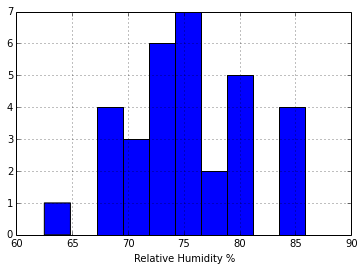

In [20]:
plt.xlabel('Relative Humidity %')
tmy_annual_rh['RHum (%)'].hist()